In [40]:
import pandas as p

data_path= "NUSW-NB15_GT.csv"
# Load the dataset
try:
    df = p.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows
df.head()

Dataset loaded successfully.


,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


In [55]:
# Display basic information about the DataFrame
df.info()

# Label Distribution
print("\nLabel Distribution:")
print(df['label'].value_counts())

# Show summary statistics
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Start time               174347 non-null  int64
 1   Last time                174347 non-null  int64
 2   Attack category          174347 non-null  int64
 3   Attack subcategory       174347 non-null  int64
 4   Protocol                 174347 non-null  int64
 5   Source IP                174347 non-null  int64
 6   Source Port              174347 non-null  int64
 7   Destination IP           174347 non-null  int64
 8   Destination Port         174347 non-null  int64
 9   Attack Name              174347 non-null  int64
 10  Attack Reference         174347 non-null  int64
 11  .                        174347 non-null  int64
 12  Attack category Labeled  174347 non-null  int64
 13  id                       174347 non-null  int64
dtypes: int64(14)
memory usage: 18.6 MB



KeyError: 'label'

In [42]:
# Load Specific Columns:
# List of columns to load
# columns_to_load = ['id', 'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'service', 'attack_cat', 'label']

# df = p.read_csv(data_path, usecols=columns_to_load)

# # Optimize Data Types:

# dtype_dict = {
#     'id': 'int32',
#     'srcip': 'object',
#     'sport': 'int16',
#     'dstip': 'object',
#     'dsport': 'int16',
#     'proto': 'category',
#     'state': 'category',
#     'dur': 'float32',
#     'service': 'category',
#     'attack_cat': 'category',
#     'label': 'category'
# }

# df = p.read_csv(data_path, dtype=dtype_dict)

# Understanding the Features

In [43]:
# List all columns
print("Columns in the dataset:")
print(df.columns.tolist())

# # Check the distribution of labels
# label_counts = df['label'].value_counts()
# print("\nLabel distribution:")
# print(label_counts)


Columns in the dataset:
['Start time', 'Last time', 'Attack category', 'Attack subcategory', 'Protocol', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Attack Name', 'Attack Reference', '.']


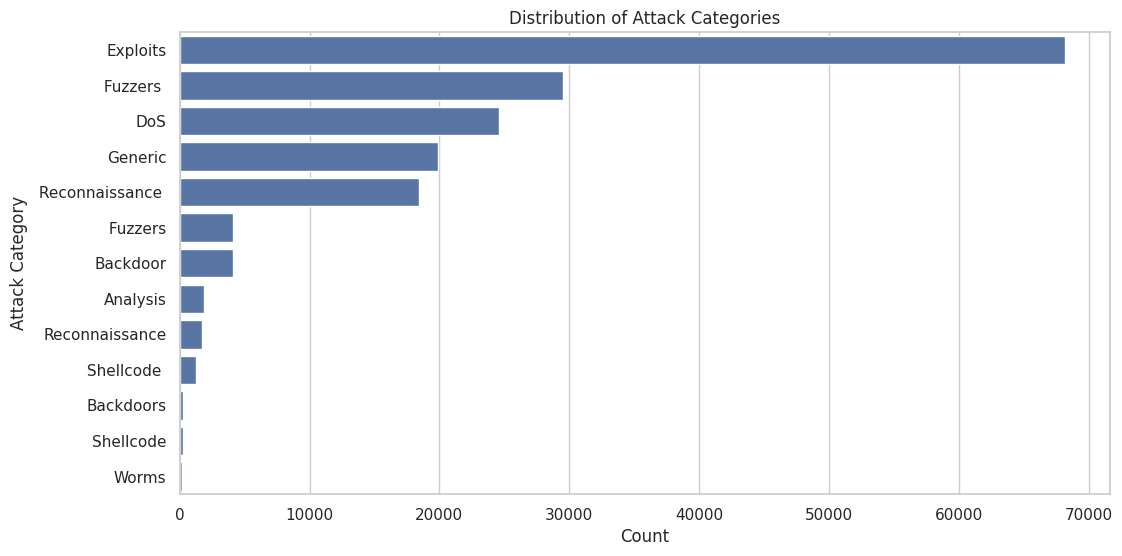

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Plot the distribution of attack categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Attack category', data=df, order=df['Attack category'].value_counts().index)
plt.title('Distribution of Attack Categories')
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.show()

# Plot correlation heatmap
# plt.figure(figsize=(15, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [49]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

# # One-Hot Encoding using pandas
# df_encoded = p.get_dummies(df, columns=categorical_cols, drop_first=True)

# df_encoded.head()
# Alternatively, using sklearn's LabelEncoder for label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attack category'] = le.fit_transform(df['Attack category'])
df['Attack subcategory'] = le.fit_transform(df['Attack subcategory'])
df['Protocol'] = le.fit_transform(df['Protocol'])
df['Source IP'] = le.fit_transform(df['Source IP'])
df['Destination IP'] = le.fit_transform(df['Destination IP'])
df['Attack Name'] = le.fit_transform(df['Attack Name'])
df['Attack Reference'] = le.fit_transform(df['Attack Reference'])
df['.'] = le.fit_transform(df['.'])

# Display the first few rows of the encoded DataFrame
df.head()

Categorical columns: ['Attack subcategory', 'Protocol', 'Source IP', 'Destination IP', 'Attack Name', 'Attack Reference', '.']


,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Attack category Labeled,id
0,1421927414,1421927416,10,85,109,0,13284,6,80,1477,0,0,10,0
1,1421927415,1421927415,8,154,115,3,21223,8,32780,5318,231,0,8,1
2,1421927416,1421927416,8,61,109,2,23357,6,80,7051,557,0,8,2
3,1421927417,1421927417,8,107,109,2,13792,6,5555,2028,2001,0,8,3
4,1421927418,1421927418,8,66,109,2,26939,0,80,1187,192,0,8,4


# Preparing Data for Machine Learning

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# generate id col
df["id"] = df.index

# Define feature columns and target
X = df.drop(['Attack category', 'Attack category Labeled', 'id'], axis=1)  # Adjust based on your encoding
y = df['Attack category Labeled']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.head())
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled


# Convert to TensorFlow datasets
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test.values))

# Batch and shuffle
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)
test_dataset = test_dataset.batch(32)

# Verify the datasets
for features, labels in train_dataset.take(1):
    print(features.shape, labels.shape)

       Start time   Last time  Attack subcategory  Protocol  Source IP  \
75998  1424237285  1424237285                  62        64          1   
37934  1424225950  1424225951                  44       109          0   
45876  1424230194  1424230194                 106         4          3   
94250  1424240313  1424240314                 159       109          2   
9178   1421931674  1421931675                  57       109          0   

       Source Port  Destination IP  Destination Port  Attack Name  \
75998            0               0                 0         1651   
37934        30984               2               111         5657   
45876            0               9                 0         3980   
94250         7988               8              1581         2267   
9178         63924               0               179          540   

       Attack Reference  .  
75998              1304  0  
37934              3070  0  
45876               418  0  
94250              1066 